In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import dataprob
import copy

import linkage


#### Load experimental data

In [2]:

blank = linkage.experiment.Experiment("data/itc_blank_expt.csv",
                                      cell_contents={},
                                      syringe_contents={"ET":5e-3},
                                      cell_volume=280)
blank.define_itc_observable(obs_column="heat",
                            obs_stdev=0.01)

binding = linkage.experiment.Experiment("data/itc_binding_expt.csv",
                                        cell_contents={"CT":0.5e-3},
                                        syringe_contents={"ET":5e-3},
                                        cell_volume=280)
binding.define_itc_observable(obs_column="heat",
                              obs_stdev=0.01)


#### Create a linkage model

In [3]:
expt_list = [blank,binding] 

gm = linkage.GlobalModel(model_name="CaEDTA",
                         expt_list=expt_list)

#### Plot data

Text(0, 0.5, 'heat')

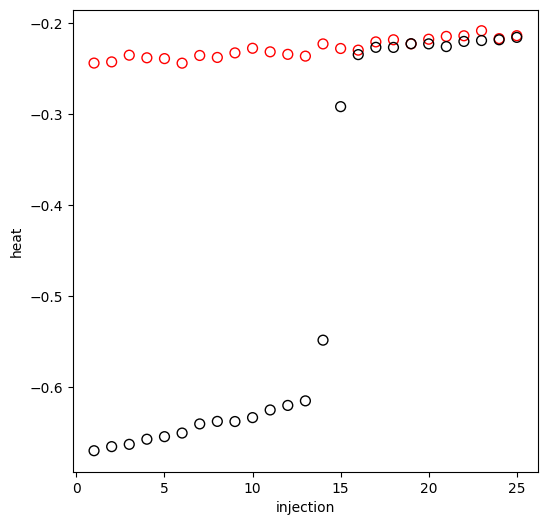

In [11]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}

color_order = ["red","black"]
fig, ax = plt.subplots(1,figsize=(6,6))
for i in range(len(gm._expt_list)):
    style["edgecolor"] = color_order[i]
    ax.scatter(np.arange(len(gm._expt_list[i].expt_data["heat"])),
               gm._expt_list[i].expt_data["heat"],**style)
plt.xlabel("injection")
plt.ylabel("heat")


#### Do fit

In [12]:
#BayesianFitter does a Bayesian sampling rather than maximum likelihood fit

F = dataprob.MLFitter()
#F = dataprob.BayesianFitter()
F.fit(model=gm.model_normalized,
      guesses=[5,-11000,0,0],
      names=gm.parameter_names,
      y_obs=gm.y_obs_normalized,
      y_stdev=gm.y_stdev_normalized)

#### Plot results

,param,estimate,stdev,low_95,high_95,guess,lower_bound,upper_bound
0,KE,6.971177,0.087264,6.795418,7.146936,5.0,-inf,inf
1,dH_E,-11949.660405,97.575492,-12146.187535,-11753.133275,-11000.0,-inf,inf
2,nuisance_dil_CT,-0.682905,6.055914,-12.880141,11.514331,0.0,-inf,inf
3,nuisance_dil_ET,-49.841584,0.308075,-50.462079,-49.221089,0.0,-inf,inf


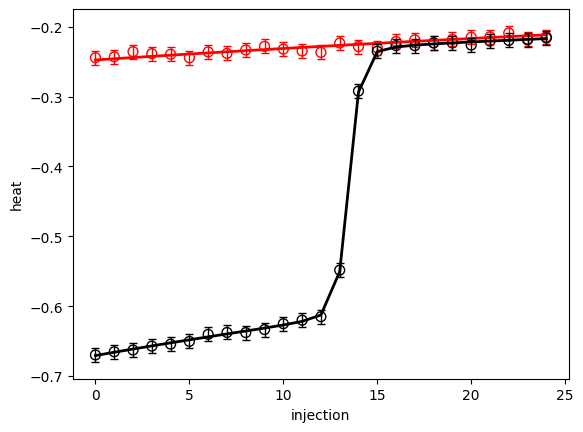

In [13]:

df = gm.as_df

style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
color_order = ["red","black"]

for expt in np.unique(df["expt_id"]):
    this_df = df.loc[df["expt_id"] == expt,:]

    x = np.arange(len(this_df))

    style["edgecolor"] = color_order[expt]
    plt.scatter(x,this_df["y_obs"],**style)
    plt.errorbar(x=x,
                 y=this_df["y_obs"],
                 yerr=this_df["y_stdev"],
                 ls="none",
                 lw=1,
                 capsize=3,
                 color=color_order[expt])
    plt.plot(np.arange(len(this_df)),
             this_df["y_calc"],
             '-',
             lw=2,
             color=color_order[expt])
plt.xlabel("injection")
plt.ylabel("heat")

F.fit_to_df

#### Corner plot to look for parameter correlations

not doing corner plot for parameter  nuisance_dil_CT
not doing corner plot for parameter  nuisance_dil_ET


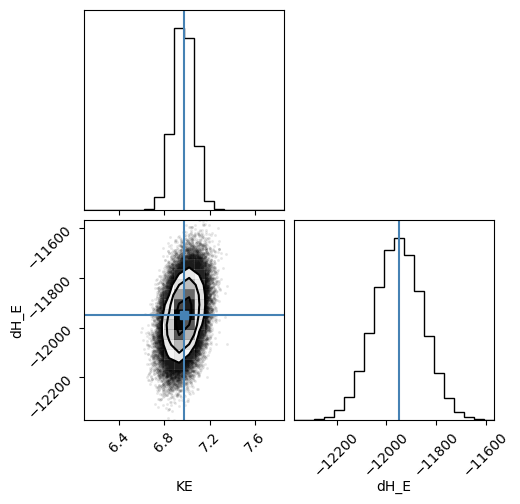

In [14]:
_ = F.corner_plot(filter_params="nuisance")